## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout

%matplotlib inline

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], l2_ratio=1e-4, drp_ratio=0.5):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(Dropout_EXP)(x)
            
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(Dropout_EXP)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = 1e-8
Dropout_EXP = 0.1


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉

#print("Experiment with Regulizer = %.6f" % (regulizer_ratio))

model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=L2_EXP, drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test), 
          shuffle=True)
    
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
    
exp_name_tag = "exp-l2"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127892). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123450). Check your callbacks.
  % delta_t_median)


 2048/50000 [>.............................] - ETA: 1:39 - loss: 2.9799 - acc: 0.0933

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137137). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126242). Check your callbacks.
  % delta_t_median)


 2816/50000 [>.............................] - ETA: 1:25 - loss: 2.9429 - acc: 0.101 - ETA: 1:20 - loss: 2.9234 - acc: 0.1033

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129035). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130325). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139719). Check your callbacks.
  % delta_t_median)


 4608/50000 [=>............................] - ETA: 58s - loss: 2.8011 - acc: 0.125

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140026). Check your callbacks.
  % delta_t_median)


 5888/50000 [==>...........................] - ETA: 51s - loss: 2.7389 - acc: 0.1376

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131439). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137922). Check your callbacks.
  % delta_t_median)


 6912/50000 [===>..........................] - ETA: 47s - loss: 2.6814 - acc: 0.1487

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143116). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136633). Check your callbacks.
  % delta_t_median)


 8704/50000 [====>.........................] - ETA: 41s - loss: 2.5984 - acc: 0.1681

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142729). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129466). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115223). Check your callbacks.
  % delta_t_median)


 9216/50000 [====>.........................] - ETA: 40s - loss: 2.5923 - acc: 0.16 - ETA: 39s - loss: 2.5829 - acc: 0.1708

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113869). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129579). Check your callbacks.
  % delta_t_median)


10240/50000 [=====>........................] - ETA: 38s - loss: 2.5456 - acc: 0.1792

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145096). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132178). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117823). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 36s - loss: 2.5151 - acc: 0.1854

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123504). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123584). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141886). Check your callbacks.
  % delta_t_median)


13312/50000 [======>.......................] - ETA: 33s - loss: 2.4598 - acc: 0.19

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160594). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145783). Check your callbacks.
  % delta_t_median)


14336/50000 [=======>......................] - ETA: 32s - loss: 2.4350 - acc: 0.2061

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.165753). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166227). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148275). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142848). Check your callbacks.
  % delta_t_median)


16128/50000 [========>.....................] - ETA: 29s - loss: 2.3947 - acc: 0.2156

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153976). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157275). Check your callbacks.
  % delta_t_median)


17920/50000 [=========>....................] - ETA: 27s - loss: 2.3604 - acc: 0.2235

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151752). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133825). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132317). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110583). Check your callbacks.
  % delta_t_median)


19968/50000 [==========>...................] - ETA: 24s - loss: 2.3288 - acc: 0.2293

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123498). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110286). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103360). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102435). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102452). Check your callbacks.
  % delta_t_median)


21248/50000 [===========>..................] - ETA: 23s - loss: 2.3110 - acc: 0.2332

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116571). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132372). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111927). Check your callbacks.
  % delta_t_median)


22528/50000 [============>.................] - ETA: 22s - loss: 2.2916 - acc: 0.2381

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124168). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144613). Check your callbacks.
  % delta_t_median)


23296/50000 [============>.................] - ETA: 21s - loss: 2.2801 - acc: 0.2409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164560). Check your callbacks.
  % delta_t_median)


24064/50000 [=============>................] - ETA: 20s - loss: 2.2720 - acc: 0.2430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126162). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137633). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136635). Check your callbacks.
  % delta_t_median)


24832/50000 [=============>................] - ETA: 20s - loss: 2.2640 - acc: 0.2448

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135139). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139128). Check your callbacks.
  % delta_t_median)


26112/50000 [==============>...............] - ETA: 18s - loss: 2.2495 - acc: 0.2482

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132146). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121675). Check your callbacks.
  % delta_t_median)


27392/50000 [===============>..............] - ETA: 17s - loss: 2.2368 - acc: 0.2514

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130153). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120179). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111766). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120244). Check your callbacks.
  % delta_t_median)


28416/50000 [================>.............] - ETA: 16s - loss: 2.2257 - acc: 0.2540

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114008). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118431). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 15s - loss: 2.2157 - acc: 0.25

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124667). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121674). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118479). Check your callbacks.
  % delta_t_median)


32000/50000 [==================>...........] - ETA: 13s - loss: 2.1981 - acc: 0.2603

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126661). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113937). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 13s - loss: 2.1917 - acc: 0.2619

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112993). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116482). Check your callbacks.
  % delta_t_median)


34048/50000 [===================>..........] - ETA: 12s - loss: 2.1823 - acc: 0.26

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127641). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115190). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109153). Check your callbacks.
  % delta_t_median)


35328/50000 [====================>.........] - ETA: 11s - loss: 2.1683 - acc: 0.2672

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129637). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120674). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115735). Check your callbacks.
  % delta_t_median)


36352/50000 [====================>.........] - ETA: 10s - loss: 2.1604 - acc: 0.2688

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106215). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110595). Check your callbacks.
  % delta_t_median)


37888/50000 [=====================>........] - ETA: 9s - loss: 2.1502 - acc: 0.2715- ETA: 9s - loss: 2.1542 - acc: 0.27

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117844). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124996). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126677). Check your callbacks.
  % delta_t_median)


38912/50000 [======================>.......] - ETA: 8s - loss: 2.1445 - acc: 0.2727

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125450). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141643). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147628). Check your callbacks.
  % delta_t_median)


40704/50000 [=======================>......] - ETA: 6s - loss: 2.1324 - acc: 0.2762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132645). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131435). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137632). Check your callbacks.
  % delta_t_median)


41472/50000 [=======================>......] - ETA: 6s - loss: 2.1281 - acc: 0.2772

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130437). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129619). Check your callbacks.
  % delta_t_median)


42496/50000 [========================>.....] - ETA: 5s - loss: 2.1231 - acc: 0.2778- ETA: 5s - loss: 2.1257 - acc: 0.27

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138372). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146768). Check your callbacks.
  % delta_t_median)


43776/50000 [=========================>....] - ETA: 4s - loss: 2.1153 - acc: 0.2793

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145030). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156610). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138547). Check your callbacks.
  % delta_t_median)


45568/50000 [==========================>...] - ETA: 3s - loss: 2.1049 - acc: 0.2822

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131143). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119542). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113119). Check your callbacks.
  % delta_t_median)


46336/50000 [==========================>...] - ETA: 2s - loss: 2.1022 - acc: 0.2830

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106224). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115660). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130030). Check your callbacks.
  % delta_t_median)


47360/50000 [===========================>..] - ETA: 1s - loss: 2.0957 - acc: 0.2848

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138514). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159347). Check your callbacks.
  % delta_t_median)


48640/50000 [============================>.] - ETA: 1s - loss: 2.0896 - acc: 0.2862

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147107). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157183). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147605). Check your callbacks.
  % delta_t_median)


49920/50000 [============================>.] - ETA: 0s - loss: 2.0823 - acc: 0.2881

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131648). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123522). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120032). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120031). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 38s 753us/step - loss: 2.0818 - acc: 0.2881 - val_loss: 1.7951 - val_acc: 0.3620
Epoch 2/50
  512/50000 [..............................] - ETA: 25s - loss: 1.7914 - acc: 0.3535

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164042). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152831). Check your callbacks.
  % delta_t_median)


 1792/50000 [>.............................] - ETA: 28s - loss: 1.8324 - acc: 0.3599

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147604). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144612). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141621). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133144). Check your callbacks.
  % delta_t_median)


 3584/50000 [=>............................] - ETA: 30s - loss: 1.8141 - acc: 0.3647

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130415). Check your callbacks.
  % delta_t_median)


 4608/50000 [=>............................] - ETA: 30s - loss: 1.8013 - acc: 0.3687

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149864). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133906). Check your callbacks.
  % delta_t_median)


 6400/50000 [==>...........................] - ETA: 27s - loss: 1.8134 - acc: 0.3642

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126163). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117685). Check your callbacks.
  % delta_t_median)


 7680/50000 [===>..........................] - ETA: 27s - loss: 1.8077 - acc: 0.3655

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123670). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129155). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117681). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105173). Check your callbacks.
  % delta_t_median)


 8448/50000 [====>.........................] - ETA: 26s - loss: 1.8085 - acc: 0.3641

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104067). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107593). Check your callbacks.
  % delta_t_median)


10496/50000 [=====>........................] - ETA: 49s - loss: 1.8023 - acc: 0.3659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105106). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102726). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107100). Check your callbacks.
  % delta_t_median)


11520/50000 [=====>........................] - ETA: 46s - loss: 1.8080 - acc: 0.3620

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105718). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105704). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107698). Check your callbacks.
  % delta_t_median)


12544/50000 [======>.......................] - ETA: 43s - loss: 1.8025 - acc: 0.36

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108211). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111701). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119181). Check your callbacks.
  % delta_t_median)


15360/50000 [========>.....................] - ETA: 37s - loss: 1.7980 - acc: 0.3635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128158). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128657). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123165). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121668). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 33s - loss: 1.7969 - acc: 0.3631

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121169). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115192). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116189). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111012). Check your callbacks.
  % delta_t_median)


18688/50000 [==========>...................] - ETA: 30s - loss: 1.7954 - acc: 0.3641

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116747). Check your callbacks.
  % delta_t_median)


19712/50000 [==========>...................] - ETA: 29s - loss: 1.7919 - acc: 0.3652

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109516). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112698). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112009). Check your callbacks.
  % delta_t_median)


20992/50000 [===========>..................] - ETA: 27s - loss: 1.7891 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116746). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110205). Check your callbacks.
  % delta_t_median)


21760/50000 [============>.................] - ETA: 26s - loss: 1.7891 - acc: 0.3665

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120178). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129564). Check your callbacks.
  % delta_t_median)


22784/50000 [============>.................] - ETA: 25s - loss: 1.7904 - acc: 0.3658

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132058). Check your callbacks.
  % delta_t_median)


24064/50000 [=============>................] - ETA: 23s - loss: 1.7886 - acc: 0.3662

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138131). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131459). Check your callbacks.
  % delta_t_median)


24576/50000 [=============>................] - ETA: 23s - loss: 1.7884 - acc: 0.3664

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113705). Check your callbacks.
  % delta_t_median)


26624/50000 [==============>...............] - ETA: 20s - loss: 1.7850 - acc: 0.3673

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114539). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113204). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113428). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110413). Check your callbacks.
  % delta_t_median)


28416/50000 [================>.............] - ETA: 18s - loss: 1.7849 - acc: 0.3667

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105890). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104861). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106419). Check your callbacks.
  % delta_t_median)


29696/50000 [================>.............] - ETA: 17s - loss: 1.7819 - acc: 0.3683

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107133). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108426). Check your callbacks.
  % delta_t_median)


30720/50000 [=================>............] - ETA: 16s - loss: 1.7798 - acc: 0.3694

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114895). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119928). Check your callbacks.
  % delta_t_median)


32000/50000 [==================>...........] - ETA: 15s - loss: 1.7780 - acc: 0.3702

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128358). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120687). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118943). Check your callbacks.
  % delta_t_median)


33280/50000 [==================>...........] - ETA: 13s - loss: 1.7782 - acc: 0.3701

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123297). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127976). Check your callbacks.
  % delta_t_median)


34048/50000 [===================>..........] - ETA: 13s - loss: 1.7780 - acc: 0.3705

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142992). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156228). Check your callbacks.
  % delta_t_median)


35584/50000 [====================>.........] - ETA: 11s - loss: 1.7768 - acc: 0.3715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134182). Check your callbacks.
  % delta_t_median)


36096/50000 [====================>.........] - ETA: 11s - loss: 1.7753 - acc: 0.3720

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139271). Check your callbacks.
  % delta_t_median)


37120/50000 [=====================>........] - ETA: 10s - loss: 1.7749 - acc: 0.3718

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121224). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111150). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109598). Check your callbacks.
  % delta_t_median)


38656/50000 [======================>.......] - ETA: 9s - loss: 1.7731 - acc: 0.3721

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124033). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118334). Check your callbacks.
  % delta_t_median)


39936/50000 [======================>.......] - ETA: 8s - loss: 1.7706 - acc: 0.3728

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113039). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127096). Check your callbacks.
  % delta_t_median)


41216/50000 [=======================>......] - ETA: 6s - loss: 1.7696 - acc: 0.3735

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126783). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125501). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115183). Check your callbacks.
  % delta_t_median)


41728/50000 [========================>.....] - ETA: 8s - loss: 1.7683 - acc: 0.3739

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117206). Check your callbacks.
  % delta_t_median)


43520/50000 [=========================>....] - ETA: 6s - loss: 1.7677 - acc: 0.3741

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118639). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116617). Check your callbacks.
  % delta_t_median)


44800/50000 [=========================>....] - ETA: 5s - loss: 1.7659 - acc: 0.3748

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120353). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118502). Check your callbacks.
  % delta_t_median)


46080/50000 [==========================>...] - ETA: 3s - loss: 1.7644 - acc: 0.3752

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124673). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137945). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146214). Check your callbacks.
  % delta_t_median)


47104/50000 [===========================>..] - ETA: 2s - loss: 1.7629 - acc: 0.3757

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152169). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133495). Check your callbacks.
  % delta_t_median)


48128/50000 [===========================>..] - ETA: 1s - loss: 1.7617 - acc: 0.3758

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122726). Check your callbacks.
  % delta_t_median)


48896/50000 [============================>.] - ETA: 1s - loss: 1.7614 - acc: 0.3760

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131647). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148602). Check your callbacks.
  % delta_t_median)


49920/50000 [============================>.] - ETA: 0s - loss: 1.7601 - acc: 0.3760

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127160). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 49s 977us/step - loss: 1.7601 - acc: 0.3760 - val_loss: 1.6300 - val_acc: 0.4180
Epoch 3/50
 1536/50000 [..............................] - ETA: 25s - loss: 1.6753 - acc: 0.3926

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142618). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146703). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125817). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109016). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102155). Check your callbacks.
  % delta_t_median)


 3072/50000 [>.............................] - ETA: 25s - loss: 1.6879 - acc: 0.3952

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103002). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106009). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103651). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106333). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106039). Check your callbacks.
  % delta_t_median)


 4352/50000 [=>............................] - ETA: 25s - loss: 1.7065 - acc: 0.3920

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103326). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105154). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107543). Check your callbacks.
  % delta_t_median)


 5632/50000 [==>...........................] - ETA: 24s - loss: 1.6969 - acc: 0.3929

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110065). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112063). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111831). Check your callbacks.
  % delta_t_median)


 6144/50000 [==>...........................] - ETA: 25s - loss: 1.7018 - acc: 0.3923

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112193). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119611). Check your callbacks.
  % delta_t_median)


 7936/50000 [===>..........................] - ETA: 25s - loss: 1.6959 - acc: 0.3914

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139616). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119379). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111683). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108062). Check your callbacks.
  % delta_t_median)


10496/50000 [=====>........................] - ETA: 23s - loss: 1.6816 - acc: 0.3955

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113845). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110503). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110102). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113180). Check your callbacks.
  % delta_t_median)


11264/50000 [=====>........................] - ETA: 23s - loss: 1.6863 - acc: 0.3950

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115602). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113354). Check your callbacks.
  % delta_t_median)


13568/50000 [=======>......................] - ETA: 21s - loss: 1.6882 - acc: 0.3962

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109105). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110202). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106022). Check your callbacks.
  % delta_t_median)


15872/50000 [========>.....................] - ETA: 20s - loss: 1.6876 - acc: 0.3954

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103919). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101973). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102224). Check your callbacks.
  % delta_t_median)


17408/50000 [=========>....................] - ETA: 19s - loss: 1.6860 - acc: 0.3946

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104357). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102651). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100266). Check your callbacks.
  % delta_t_median)


18944/50000 [==========>...................] - ETA: 18s - loss: 1.6911 - acc: 0.3937

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104395). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103797). Check your callbacks.
  % delta_t_median)


22016/50000 [============>.................] - ETA: 16s - loss: 1.6826 - acc: 0.3954

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103647). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104452). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105944). Check your callbacks.
  % delta_t_median)


23808/50000 [=============>................] - ETA: 15s - loss: 1.6818 - acc: 0.39

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106491). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103336). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100117). Check your callbacks.
  % delta_t_median)


25344/50000 [==============>...............] - ETA: 22s - loss: 1.6784 - acc: 0.3973

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104653). Check your callbacks.
  % delta_t_median)


26368/50000 [==============>...............] - ETA: 21s - loss: 1.6768 - acc: 0.3976

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114660). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116787). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139421). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129977). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105506). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104408). Check your callbacks.
  % delta_t_median)


30208/50000 [=================>............] - ETA: 17s - loss: 1.6749 - acc: 0.3992

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106944). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105282). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106680). Check your callbacks.
  % delta_t_median)


32768/50000 [==================>...........] - ETA: 14s - loss: 1.6742 - acc: 0.3997

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105786). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107161). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104879). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104927). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104935). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105526). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103595). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108577). Check your callbacks.
  % delta_t_median)


36864/50000 [=====================>........] - ETA: 10s - loss: 1.6757 - acc: 0.3994

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109706). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110352). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111779). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108578). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105751). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

39936/50000 [======================>.......] - ETA: 8s - loss: 1.6751 - acc: 0.4005- ETA: 8s - loss: 1.6755 - acc: 0.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103022). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101855). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103082). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104606). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108935). Check your callbacks.
  % delta_t_median)


41984/50000 [========================>.....] - ETA: 6s - loss: 1.6737 - acc: 0.4013

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136789). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146092). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123998). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119072). Check your callbacks.
  % delta_t_median)


44544/50000 [=========================>....] - ETA: 4s - loss: 1.6713 - acc: 0.4030

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128375). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111128). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107139). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106527). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105243). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

47104/50000 [===========================>..] - ETA: 2s - loss: 1.6702 - acc: 0.4029

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103436). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103477). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100979). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105573). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104617). Check your callbacks.
  % delta_t_median)


49664/50000 [============================>.] - ETA: 0s - loss: 1.6681 - acc: 0.4042

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106763). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107695). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105345). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101520). Check your callbacks.
  % delta_t_median)


49920/50000 [============================>.] - ETA: 0s - loss: 1.6677 - acc: 0.4042

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107747). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104129). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 39s 770us/step - loss: 1.6675 - acc: 0.4043 - val_loss: 1.6033 - val_acc: 0.4293
Epoch 4/50
 2304/50000 [>.............................] - ETA: 25s - loss: 1.6151 - acc: 0.4375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119207). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115944). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129947). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115852). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115761). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 4352/50000 [=>............................] - ETA: 24s - loss: 1.6095 - acc: 0.4375

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100748). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112235). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107284). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103303). Check your callbacks.
  % delta_t_median)


 6400/50000 [==>...........................] - ETA: 24s - loss: 1.6176 - acc: 0.4303

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119035). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103441). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102014). Check your callbacks.
  % delta_t_median)


 7680/50000 [===>..........................] - ETA: 1:05 - loss: 1.6121 - acc: 0.4297

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108985). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123958). Check your callbacks.
  % delta_t_median)


 8960/50000 [====>.........................] - ETA: 58s - loss: 1.6134 - acc: 0.4279

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117044). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126036). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135965). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140769). Check your callbacks.
  % delta_t_median)


11520/50000 [=====>........................] - ETA: 47s - loss: 1.6149 - acc: 0.4266 ETA: 55s - loss: 1.6118

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141215). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148466). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139425). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134851). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117222). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

13824/50000 [=======>......................] - ETA: 42s - loss: 1.6141 - acc: 0.4264

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122285). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134056). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146351). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148507). Check your callbacks.
  % delta_t_median)


16896/50000 [=========>....................] - ETA: 34s - loss: 1.6133 - acc: 0.42

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143727). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140781). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131110). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127046). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119905). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21248/50000 [===========>..................] - ETA: 27s - loss: 1.6193 - acc: 0.4243

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107054). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108117). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106139). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109140). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

23040/50000 [============>.................] - ETA: 25s - loss: 1.6159 - acc: 0.4250

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110316). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112954). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128626). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129788). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141809). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

25600/50000 [==============>...............] - ETA: 22s - loss: 1.6114 - acc: 0.42

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135295). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130096). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124589). Check your callbacks.
  % delta_t_median)


28160/50000 [===============>..............] - ETA: 19s - loss: 1.6089 - acc: 0.4273

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132348). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148749). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137469). Check your callbacks.
  % delta_t_median)


30976/50000 [=================>............] - ETA: 16s - loss: 1.6078 - acc: 0.4278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138794). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123337). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122904). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125681). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145329). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

33024/50000 [==================>...........] - ETA: 14s - loss: 1.6074 - acc: 0.4275

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136354). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153299). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157070). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158077). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158575). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158576). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159075). Check your callbacks.
  % delta_t_median)


39424/50000 [======================>.......] - ETA: 8s - loss: 1.6052 - acc: 0.4283

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157080). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155583). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151595). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140687). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123936). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

40960/50000 [=======================>......] - ETA: 8s - loss: 1.6052 - acc: 0.4284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106426). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113333). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130657). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134389). Check your callbacks.
  % delta_t_median)


45824/50000 [==========================>...] - ETA: 3s - loss: 1.6053 - acc: 0.4284

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143538). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138659). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139836). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124540). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49408/50000 [============================>.] - ETA: 0s - loss: 1.6042 - acc: 0.4283

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102744). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110264). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106364). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107266). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121442). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.6041 - acc: 0.4281

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137855). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147316). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 46s 925us/step - loss: 1.6040 - acc: 0.4282 - val_loss: 1.5613 - val_acc: 0.4402
Epoch 5/50
 1792/50000 [>.............................] - ETA: 30s - loss: 1.5782 - acc: 0.4314

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111958). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126498). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141039). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135597). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130892). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136216). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130523). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109457). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109289). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 9728/50000 [====>.........................] - ETA: 24s - loss: 1.5618 - acc: 0.43

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133718). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121263). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108645). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105115). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102138). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

17664/50000 [=========>....................] - ETA: 18s - loss: 1.5582 - acc: 0.4390

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136915). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124424). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118247). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115185). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

20992/50000 [===========>..................] - ETA: 17s - loss: 1.5635 - acc: 0.4361

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105632). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108658). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112608). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117987). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116284). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22272/50000 [============>.................] - ETA: 16s - loss: 1.5653 - acc: 0.4367

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141437). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144428). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142725). Check your callbacks.
  % delta_t_median)


24832/50000 [=============>................] - ETA: 21s - loss: 1.5663 - acc: 0.4354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146899). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151694). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152346). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149254). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147551). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28160/50000 [===============>..............] - ETA: 18s - loss: 1.5625 - acc: 0.4387

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146481). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150002). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148524). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148054). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151778). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

31488/50000 [=================>............] - ETA: 15s - loss: 1.5605 - acc: 0.4401 ETA: 16s - loss: 1.5588

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136411). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134759). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121215). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135294). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144239). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

39168/50000 [======================>.......] - ETA: 8s - loss: 1.5589 - acc: 0.4409

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128735). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118122). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117438). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111844). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108565). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

44032/50000 [=========================>....] - ETA: 4s - loss: 1.5594 - acc: 0.441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110251). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111301). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109891). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105518). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

47360/50000 [===========================>..] - ETA: 2s - loss: 1.5592 - acc: 0.441

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138524). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127701). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133183). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135159). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138783). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.5592 - acc: 0.4421

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145616). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151393). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154018). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155210). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146475). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 768us/step - loss: 1.5592 - acc: 0.4422 - val_loss: 1.5200 - val_acc: 0.4586
Epoch 6/50
 4864/50000 [=>............................] - ETA: 25s - loss: 1.5066 - acc: 0.46

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120612). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133553). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128474). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127049). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 7680/50000 [===>..........................] - ETA: 53s - loss: 1.5098 - acc: 0.45

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100571). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107999). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119421). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125071). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137381). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

12800/50000 [======>.......................] - ETA: 38s - loss: 1.5163 - acc: 0.4552 ETA: 47s - 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159281). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153589). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155582). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156581). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152592). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

17664/50000 [=========>....................] - ETA: 30s - loss: 1.5212 - acc: 0.45

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126701). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152547). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153687). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150650). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21504/50000 [===========>..................] - ETA: 25s - loss: 1.5160 - acc: 0.4591

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143626). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147821). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146305). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146272). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143428). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

32000/50000 [==================>...........] - ETA: 13s - loss: 1.5167 - acc: 0.4587

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136121). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134459). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133463). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130201). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117300). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

36096/50000 [====================>.........] - ETA: 10s - loss: 1.5163 - acc: 0.4591

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108928). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121395). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128799). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138364). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146111). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

38144/50000 [=====================>........] - ETA: 9s - loss: 1.5177 - acc: 0.4586

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141449). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143614). Check your callbacks.
  % delta_t_median)


40960/50000 [=======================>......] - ETA: 7s - loss: 1.5196 - acc: 0.4582

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147802). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150479). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145212). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145637). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151899). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46592/50000 [==========================>...] - ETA: 2s - loss: 1.5209 - acc: 0.4570

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139662). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135696). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131686). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124664). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113715). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 43s 856us/step - loss: 1.5218 - acc: 0.4563 - val_loss: 1.4993 - val_acc: 0.4619
Epoch 7/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138986). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132417). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119720). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108185). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106794). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 8448/50000 [====>.........................] - ETA: 24s - loss: 1.4972 - acc: 0.4631 ETA

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202458). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154087). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105717). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104221). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102725). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

14336/50000 [=======>......................] - ETA: 22s - loss: 1.5017 - acc: 0.4617

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124816). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111619). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107852). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109793). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128970). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

18432/50000 [==========>...................] - ETA: 20s - loss: 1.4990 - acc: 0.4619

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149501). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147519). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144126). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141119). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139140). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21248/50000 [===========>..................] - ETA: 19s - loss: 1.4963 - acc: 0.46

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141689). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145873). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148748). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149542). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150334). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152217). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149971). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149631). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144449). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139137). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

30208/50000 [=================>............] - ETA: 15s - loss: 1.4994 - acc: 0.4635

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136806). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137286). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134556). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137406). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37888/50000 [=====================>........] - ETA: 9s - loss: 1.5002 - acc: 0.4637

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125500). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111976). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111390). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119381). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

44544/50000 [=========================>....] - ETA: 4s - loss: 1.4995 - acc: 0.463

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149619). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136538). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118202). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112947). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.4984 - acc: 0.4643

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136600). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132177). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126977). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117582). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109707). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 752us/step - loss: 1.4986 - acc: 0.4643 - val_loss: 1.4919 - val_acc: 0.4597
Epoch 8/50
 4608/50000 [=>............................] - ETA: 29s - loss: 1.4723 - acc: 0.4770

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117993). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120270). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122548). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126960). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131372). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

11008/50000 [=====>........................] - ETA: 39s - loss: 1.4768 - acc: 0.4723

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123931). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117093). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105356). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126928). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137256). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

20480/50000 [===========>..................] - ETA: 24s - loss: 1.4690 - acc: 0.4762

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143920). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146753). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145145). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141455). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140574). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

26368/50000 [==============>...............] - ETA: 18s - loss: 1.4702 - acc: 0.4773

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120559). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122913). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128360). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142355). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144875). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

36608/50000 [====================>.........] - ETA: 9s - loss: 1.4706 - acc: 0.4763

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149666). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145617). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156148). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157540). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152253). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110695). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101431). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103557). Check your callbacks.
  % delta_t_median)


44288/50000 [=========================>....] - ETA: 4s - loss: 1.4691 - acc: 0.4776

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120840). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113597). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127633). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132882). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140068). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.4723 - acc: 0.4769

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139663). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127948). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113964). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105452). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 42s 848us/step - loss: 1.4726 - acc: 0.4769 - val_loss: 1.4812 - val_acc: 0.4721
Epoch 9/50
 4352/50000 [=>............................] - ETA: 31s - loss: 1.4377 - acc: 0.4917

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104960). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118802). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143227). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140320). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147040). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 9984/50000 [====>.........................] - ETA: 29s - loss: 1.4379 - acc: 0.4870

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141601). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138609). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140230). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144571). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145799). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

16384/50000 [========>.....................] - ETA: 24s - loss: 1.4574 - acc: 0.47

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144189). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141630). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139888). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135879). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21248/50000 [===========>..................] - ETA: 21s - loss: 1.4536 - acc: 0.48

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155108). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152200). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148480). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130199). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143953). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152120). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154665). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146424). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144216). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

33024/50000 [==================>...........] - ETA: 13s - loss: 1.4511 - acc: 0.4834

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150822). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142275). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150097). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146607). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142120). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

38912/50000 [======================>.......] - ETA: 8s - loss: 1.4495 - acc: 0.4833

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148268). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152836). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150823). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147428). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147251). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46336/50000 [==========================>...] - ETA: 2s - loss: 1.4462 - acc: 0.4838

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142641). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139637). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130072). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131328). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133120). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 39s 778us/step - loss: 1.4482 - acc: 0.4838 - val_loss: 1.4552 - val_acc: 0.4781
Epoch 10/50
 2304/50000 [>.............................] - ETA: 31s - loss: 1.4518 - acc: 0.47

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138041). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129151). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117674). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110830). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105497). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 4352/50000 [=>............................] - ETA: 32s - loss: 1.4596 - acc: 0.4763

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141618). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143924). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146037). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146287). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148557). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141717). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141803). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143003). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146994). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

19968/50000 [==========>...................] - ETA: 22s - loss: 1.4338 - acc: 0.4879

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137646). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131438). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127690). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131891). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128354). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

27136/50000 [===============>..............] - ETA: 16s - loss: 1.4367 - acc: 0.48

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128656). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125164). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136634). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139279). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146175). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

35328/50000 [====================>.........] - ETA: 10s - loss: 1.4271 - acc: 0.4892

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148588). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140601). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133753). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126045). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111078). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37888/50000 [=====================>........] - ETA: 8s - loss: 1.4263 - acc: 0.4898

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141269). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138769). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135654). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137536). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148309). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

43008/50000 [========================>.....] - ETA: 5s - loss: 1.4252 - acc: 0.4909

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149915). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155761). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150697). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146469). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143027). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 801us/step - loss: 1.4255 - acc: 0.4913 - val_loss: 1.4652 - val_acc: 0.4756


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153396). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140035). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119590). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109999). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104578). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

Epoch 11/50
 6144/50000 [==>...........................] - ETA: 31s - loss: 1.4045 - acc: 0.49

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119407). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124241). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128008). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132012). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

15104/50000 [========>.....................] - ETA: 23s - loss: 1.3938 - acc: 0.4997

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149341). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145317). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128945). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109135). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101523). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

20992/50000 [===========>..................] - ETA: 19s - loss: 1.4040 - acc: 0.4968 ETA: 20s - loss: 1.4021

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149599). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138130). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117186). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107712). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136136). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28928/50000 [================>.............] - ETA: 16s - loss: 1.4000 - acc: 0.4978

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120942). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138197). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141795). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138385). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134442). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

39680/50000 [======================>.......] - ETA: 7s - loss: 1.4054 - acc: 0.497

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142290). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131050). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138742). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126419). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132644). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.4072 - acc: 0.4968

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135182). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148977). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151121). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144345). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143408). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 732us/step - loss: 1.4071 - acc: 0.4969 - val_loss: 1.4538 - val_acc: 0.4814
Epoch 12/50
 4608/50000 [=>............................] - ETA: 31s - loss: 1.3741 - acc: 0.51

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120677). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134379). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130653). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135414). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 9984/50000 [====>.........................] - ETA: 39s - loss: 1.3713 - acc: 0.5120

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147120). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147105). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148617). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150098). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152093). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

18944/50000 [==========>...................] - ETA: 26s - loss: 1.3843 - acc: 0.5051

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153230). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146249). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156404). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160107). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150591). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28672/50000 [================>.............] - ETA: 16s - loss: 1.3861 - acc: 0.50

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133785). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127928). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111047). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109150). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

36608/50000 [====================>.........] - ETA: 10s - loss: 1.3904 - acc: 0.50

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138761). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141650). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142638). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135893). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

38400/50000 [======================>.......] - ETA: 8s - loss: 1.3902 - acc: 0.5036

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155055). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153492). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137164). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118341). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111574). Check your callbacks.
  % delta_t_median)


45568/50000 [==========================>...] - ETA: 3s - loss: 1.3909 - acc: 0.502

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115941). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114699). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121211). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128966). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131529). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 42s 832us/step - loss: 1.3918 - acc: 0.5013 - val_loss: 1.4564 - val_acc: 0.4760
Epoch 13/50
 1536/50000 [..............................] - ETA: 30s - loss: 1.4603 - acc: 0.4818

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142521). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140112). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129273). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115124). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107567). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

13568/50000 [=======>......................] - ETA: 22s - loss: 1.3818 - acc: 0.5090

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133684). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132481). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125155). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116594). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114232). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22016/50000 [============>.................] - ETA: 18s - loss: 1.3799 - acc: 0.50

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151549). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149925). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138157). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135786). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135105). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28672/50000 [================>.............] - ETA: 16s - loss: 1.3765 - acc: 0.5106

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144859). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143790). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143627). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139657). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141558). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

41472/50000 [=======================>......] - ETA: 6s - loss: 1.3742 - acc: 0.5106

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135971). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132359). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130606). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120182). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106305). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.3761 - acc: 0.5095

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147179). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148909). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146842). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147219). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152044). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 719us/step - loss: 1.3761 - acc: 0.5095 - val_loss: 1.4062 - val_acc: 0.4958
Epoch 14/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118683). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130651). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123402). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130467). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127188). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142853). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145727). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141100). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139668). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139379). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

24320/50000 [=============>................] - ETA: 21s - loss: 1.3622 - acc: 0.51

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175313). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150368). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137467). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125456). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118989). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

35840/50000 [====================>.........] - ETA: 10s - loss: 1.3582 - acc: 0.5122

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143941). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150657). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160105). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158328). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151475). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142756). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136832). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146816). Check your callbacks.
  % delta_t_median)


46592/50000 [==========================>...] - ETA: 2s - loss: 1.3565 - acc: 0.5141

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149600). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152971). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147489). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151954). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 824us/step - loss: 1.3566 - acc: 0.5143 - val_loss: 1.4362 - val_acc: 0.4839
Epoch 15/50
 4096/50000 [=>............................] - ETA: 31s - loss: 1.3466 - acc: 0.5244

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105766). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104681). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105557). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106221). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105054). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

14592/50000 [=======>......................] - ETA: 23s - loss: 1.3486 - acc: 0.5239

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136386). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139158). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133770). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136648). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141523). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22784/50000 [============>.................] - ETA: 16s - loss: 1.3477 - acc: 0.5220

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138605). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122451). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124163). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120996). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115048). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28672/50000 [================>.............] - ETA: 16s - loss: 1.3442 - acc: 0.5203

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102244). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104372). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105534). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112423). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

39680/50000 [======================>.......] - ETA: 7s - loss: 1.3423 - acc: 0.5211

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141273). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129318). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144531). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147606). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109208). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49408/50000 [============================>.] - ETA: 0s - loss: 1.3428 - acc: 0.5206- ETA: 3s - loss: 1.34

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131801). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137572). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138543). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135909). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 749us/step - loss: 1.3435 - acc: 0.5207 - val_loss: 1.4273 - val_acc: 0.4933
Epoch 16/50
 4608/50000 [=>............................] - ETA: 32s - loss: 1.2941 - acc: 0.53

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130770). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136491). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144912). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135953). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127478). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 6912/50000 [===>..........................] - ETA: 43s - loss: 1.2996 - acc: 0.5317

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154870). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132804). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124883). Check your callbacks.
  % delta_t_median)


19200/50000 [==========>...................] - ETA: 23s - loss: 1.3045 - acc: 0.5312

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134392). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119794). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123650). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133130). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

28416/50000 [================>.............] - ETA: 16s - loss: 1.3131 - acc: 0.5278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134694). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135298). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140552). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141383). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143046). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37888/50000 [=====================>........] - ETA: 8s - loss: 1.3167 - acc: 0.5278

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144710). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143517). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147339). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147175). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145577). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

39424/50000 [======================>.......] - ETA: 7s - loss: 1.3192 - acc: 0.527

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141202). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143316). Check your callbacks.
  % delta_t_median)


46336/50000 [==========================>...] - ETA: 3s - loss: 1.3216 - acc: 0.525

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143482). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143468). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147433). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145312). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146023). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 818us/step - loss: 1.3229 - acc: 0.5257 - val_loss: 1.3943 - val_acc: 0.5001
Epoch 17/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140910). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145069). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143813). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147824). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147192). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

12288/50000 [======>.......................] - ETA: 26s - loss: 1.3097 - acc: 0.53

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143728). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144624). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146815). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143929). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140841). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22784/50000 [============>.................] - ETA: 18s - loss: 1.3054 - acc: 0.53

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144027). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141631). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143893). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141639). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137879). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

30464/50000 [=================>............] - ETA: 14s - loss: 1.3018 - acc: 0.5360

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144279). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143548). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146772). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145378). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145500). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113136). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124861). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138939). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137065). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140529). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 724us/step - loss: 1.3047 - acc: 0.5348 - val_loss: 1.3827 - val_acc: 0.5029
Epoch 18/50
 1536/50000 [..............................] - ETA: 22s - loss: 1.2650 - acc: 0.5384

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147127). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148083). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150115). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149160). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147835). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 6400/50000 [==>...........................] - ETA: 21s - loss: 1.2820 - acc: 0.5369

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135611). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121528). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112735). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107744). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105229). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

18176/50000 [=========>....................] - ETA: 25s - loss: 1.2928 - acc: 0.5354

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105021). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105145). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108201). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110580). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116963). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141829). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154545). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152402). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145485). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151902). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

40192/50000 [=======================>......] - ETA: 6s - loss: 1.2942 - acc: 0.5386

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150308). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140429). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138060). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137324). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138225). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

45824/50000 [==========================>...] - ETA: 3s - loss: 1.2962 - acc: 0.5368

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135924). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137187). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138737). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141040). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142770). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 818us/step - loss: 1.2966 - acc: 0.5371 - val_loss: 1.4020 - val_acc: 0.4995
Epoch 19/50
 3328/50000 [>.............................] - ETA: 29s - loss: 1.2920 - acc: 0.5430

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146347). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147614). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147981). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147854). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142901). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

13824/50000 [=======>......................] - ETA: 25s - loss: 1.2903 - acc: 0.5366

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143002). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148063). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148437). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144906). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

24064/50000 [=============>................] - ETA: 16s - loss: 1.2843 - acc: 0.5400

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145261). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142911). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141896). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144610). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138021). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

33792/50000 [===================>..........] - ETA: 11s - loss: 1.2882 - acc: 0.5383

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104122). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105330). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106531). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113968). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131371). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 34s 680us/step - loss: 1.2858 - acc: 0.5385 - val_loss: 1.3692 - val_acc: 0.5074
Epoch 20/50
 1280/50000 [..............................] - ETA: 26s - loss: 1.2841 - acc: 0.54

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149450). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154223). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155340). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155181). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150297). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

 7680/50000 [===>..........................] - ETA: 30s - loss: 1.2821 - acc: 0.5448 ETA: 31s - loss: 1.2822 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131299). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146986). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151095). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152833). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21760/50000 [============>.................] - ETA: 24s - loss: 1.2744 - acc: 0.5463

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134961). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133967). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144500). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153503). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143996). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133506). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130283). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122079). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110212). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104491). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.2769 - acc: 0.5436

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122311). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148103). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161568). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156082). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150597). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 42s 850us/step - loss: 1.2770 - acc: 0.5436 - val_loss: 1.4140 - val_acc: 0.4909
Epoch 21/50
13056/50000 [======>.......................] - ETA: 23s - loss: 1.2543 - acc: 0.5506

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141622). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159574). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158937). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150279). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143748). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

24832/50000 [=============>................] - ETA: 16s - loss: 1.2609 - acc: 0.54

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142502). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142419). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141050). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145411). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133170). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141007). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141665). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132423). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138624). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144506). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147032). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148768). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149732). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150472). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 749us/step - loss: 1.2616 - acc: 0.5493 - val_loss: 1.3842 - val_acc: 0.5061
Epoch 22/50
 6400/50000 [==>...........................] - ETA: 28s - loss: 1.2464 - acc: 0.5559

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152949). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134605). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119043). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102785). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107931). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104773). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114070). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131042). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141162). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139012). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22528/50000 [============>.................] - ETA: 21s - loss: 1.2434 - acc: 0.5534

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148876). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139417). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131010). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135767). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134233). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

35840/50000 [====================>.........] - ETA: 10s - loss: 1.2519 - acc: 0.5498

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139255). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133423). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131674). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131456). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117394). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

42752/50000 [========================>.....] - ETA: 5s - loss: 1.2497 - acc: 0.550

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141971). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143093). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138928). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128926). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130937). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.2528 - acc: 0.5499

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152205). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145683). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144648). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140433). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136851). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 796us/step - loss: 1.2526 - acc: 0.5500 - val_loss: 1.4005 - val_acc: 0.5028
Epoch 23/50
14080/50000 [=======>......................] - ETA: 23s - loss: 1.2338 - acc: 0.5610

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111956). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113706). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116772). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118087). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123748). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103817). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104504). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110041). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125822). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133193). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37120/50000 [=====================>........] - ETA: 9s - loss: 1.2448 - acc: 0.5554

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103293). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105954). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121210). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133689). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136032). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.2504 - acc: 0.5544

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134357). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122099). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108012). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106099). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113200). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 744us/step - loss: 1.2505 - acc: 0.5543 - val_loss: 1.3933 - val_acc: 0.5029
Epoch 24/50
 9728/50000 [====>.........................] - ETA: 28s - loss: 1.2513 - acc: 0.5473

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101461). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128579). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129680). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129329). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

17152/50000 [=========>....................] - ETA: 26s - loss: 1.2442 - acc: 0.5530

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156522). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150943). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146097). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146759). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142259). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

32512/50000 [==================>...........] - ETA: 12s - loss: 1.2418 - acc: 0.5551

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133482). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131565). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129445). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117061). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102484). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

43264/50000 [========================>.....] - ETA: 4s - loss: 1.2431 - acc: 0.5545

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136392). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125033). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121413). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116074). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111380). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 792us/step - loss: 1.2426 - acc: 0.5550 - val_loss: 1.3883 - val_acc: 0.5114
Epoch 25/50
 2048/50000 [>.............................] - ETA: 30s - loss: 1.2408 - acc: 0.5566

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137939). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140410). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138405). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142973). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140384). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21248/50000 [===========>..................] - ETA: 17s - loss: 1.2128 - acc: 0.5654

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128141). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123328). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115495). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108459). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108060). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

27136/50000 [===============>..............] - ETA: 14s - loss: 1.2174 - acc: 0.56

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135656). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139423). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141522). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139974). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

42496/50000 [========================>.....] - ETA: 5s - loss: 1.2249 - acc: 0.560

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140245). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136537). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133560). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133898). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133415). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 710us/step - loss: 1.2268 - acc: 0.5601 - val_loss: 1.3630 - val_acc: 0.5185
Epoch 26/50
 3840/50000 [=>............................] - ETA: 29s - loss: 1.2251 - acc: 0.56

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135089). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143981). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137851). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139941). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138600). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

10752/50000 [=====>........................] - ETA: 27s - loss: 1.2179 - acc: 0.5632 ETA: 27s - loss: 1.2165 - acc: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143326). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147911). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146062). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153249). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150006). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

23808/50000 [=============>................] - ETA: 20s - loss: 1.2083 - acc: 0.5666

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113170). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102757). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104766). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102571). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102644). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106715). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108672). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118451). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131074). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133366). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

44544/50000 [=========================>....] - ETA: 4s - loss: 1.2138 - acc: 0.5651

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149300). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151383). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141225). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143442). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138713). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.2143 - acc: 0.5647

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143040). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138926). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144903). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142908). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 826us/step - loss: 1.2142 - acc: 0.5648 - val_loss: 1.3848 - val_acc: 0.5100
Epoch 27/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141123). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146608). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152767). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152487). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147500). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

27392/50000 [===============>..............] - ETA: 15s - loss: 1.2062 - acc: 0.5693

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147525). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148525). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148000). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152119). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

45312/50000 [==========================>...] - ETA: 3s - loss: 1.2076 - acc: 0.5676

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149696). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156011). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158141). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156471). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151586). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 35s 708us/step - loss: 1.2073 - acc: 0.5674 - val_loss: 1.3583 - val_acc: 0.5154
Epoch 28/50
 5120/50000 [==>...........................] - ETA: 31s - loss: 1.1872 - acc: 0.56

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100983). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105502). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110534). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115819). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119425). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

11776/50000 [======>.......................] - ETA: 26s - loss: 1.1961 - acc: 0.5659

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147345). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160237). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141370). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

21760/50000 [============>.................] - ETA: 23s - loss: 1.1912 - acc: 0.5715

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145801). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149801). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149351). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145166). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139502). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37888/50000 [=====================>........] - ETA: 9s - loss: 1.1951 - acc: 0.571

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149914). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143363). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129304). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120142). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119633). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

45824/50000 [==========================>...] - ETA: 3s - loss: 1.1962 - acc: 0.571

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144883). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145129). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146971). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149785). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 42s 834us/step - loss: 1.1953 - acc: 0.5723 - val_loss: 1.4481 - val_acc: 0.4892
Epoch 29/50
 4096/50000 [=>............................] - ETA: 31s - loss: 1.1830 - acc: 0.5764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141182). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143450). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143022). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143882). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145163). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

17664/50000 [=========>....................] - ETA: 23s - loss: 1.1843 - acc: 0.5806

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140451). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144593). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140731). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140499). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141732). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138560). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138617). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138369). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136514). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136572). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46336/50000 [==========================>...] - ETA: 2s - loss: 1.1865 - acc: 0.5805

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142057). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147965). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150106). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151594). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149737). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 736us/step - loss: 1.1845 - acc: 0.5806 - val_loss: 1.4059 - val_acc: 0.5059
Epoch 30/50
 7680/50000 [===>..........................] - ETA: 30s - loss: 1.1802 - acc: 0.5764

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137080). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136576). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134184). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127649). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122283). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

17408/50000 [=========>....................] - ETA: 25s - loss: 1.1726 - acc: 0.58

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137243). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135837). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132714). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128084). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124396). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

34816/50000 [===================>..........] - ETA: 11s - loss: 1.1706 - acc: 0.5797

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145311). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148850). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143665). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136464). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143998). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

47616/50000 [===========================>..] - ETA: 1s - loss: 1.1744 - acc: 0.579

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148224). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145187). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141899). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143610). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145913). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 39s 789us/step - loss: 1.1747 - acc: 0.5798 - val_loss: 1.3783 - val_acc: 0.5098
Epoch 31/50
14848/50000 [=======>......................] - ETA: 21s - loss: 1.1769 - acc: 0.5817

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151274). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137705). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132821). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122965). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110450). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

31744/50000 [==================>...........] - ETA: 10s - loss: 1.1773 - acc: 0.5799

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142579). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125952). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114631). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105043). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101392). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

45312/50000 [==========================>...] - ETA: 3s - loss: 1.1722 - acc: 0.5809

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114016). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119073). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120827). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127174). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129900). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 718us/step - loss: 1.1744 - acc: 0.5807 - val_loss: 1.4061 - val_acc: 0.5033
Epoch 32/50
10240/50000 [=====>........................] - ETA: 27s - loss: 1.1483 - acc: 0.5840

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145229). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126706). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113456). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106553). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103504). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

19200/50000 [==========>...................] - ETA: 24s - loss: 1.1537 - acc: 0.5877

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137198). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133512). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122565). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111863). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110496). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

36608/50000 [====================>.........] - ETA: 9s - loss: 1.1624 - acc: 0.5850 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114322). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109113). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108115). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110207). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113814). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145526). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144474). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150645). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145375). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146503). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 811us/step - loss: 1.1653 - acc: 0.5847 - val_loss: 1.4534 - val_acc: 0.4909
Epoch 33/50
 7424/50000 [===>..........................] - ETA: 23s - loss: 1.1627 - acc: 0.5877

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134091). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145920). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111361). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110763). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104526). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

26880/50000 [===============>..............] - ETA: 14s - loss: 1.1611 - acc: 0.5857

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137435). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137069). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120050). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107793). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104008). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

33280/50000 [==================>...........] - ETA: 10s - loss: 1.1598 - acc: 0.58

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144485). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146216). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144620). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148640). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147181). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46848/50000 [===========================>..] - ETA: 2s - loss: 1.1609 - acc: 0.5860

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140221). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139901). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143126). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145150). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147281). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 752us/step - loss: 1.1630 - acc: 0.5856 - val_loss: 1.4399 - val_acc: 0.4898
Epoch 34/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157352). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159344). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152553). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145734). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22272/50000 [============>.................] - ETA: 20s - loss: 1.1303 - acc: 0.5921

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142612). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137916). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139389). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135527). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133659). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

38144/50000 [=====================>........] - ETA: 8s - loss: 1.1462 - acc: 0.5880

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140570). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144073). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147070). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146861). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145797). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 737us/step - loss: 1.1477 - acc: 0.5880 - val_loss: 1.3760 - val_acc: 0.5159
Epoch 35/50
  512/50000 [..............................] - ETA: 17s - loss: 1.0957 - acc: 0.5918

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127442). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122101). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119842). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117522). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127792). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

13056/50000 [======>.......................] - ETA: 30s - loss: 1.1451 - acc: 0.5931

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.821539). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123350). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132469). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127959). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123449). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

32512/50000 [==================>...........] - ETA: 12s - loss: 1.1415 - acc: 0.5925

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149070). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144939). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134132). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123699). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120201). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46080/50000 [==========================>...] - ETA: 2s - loss: 1.1383 - acc: 0.5937

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136616). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143168). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141640). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144335). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136925). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 746us/step - loss: 1.1374 - acc: 0.5942 - val_loss: 1.4245 - val_acc: 0.5021
Epoch 36/50
16128/50000 [========>.....................] - ETA: 20s - loss: 1.1303 - acc: 0.5966

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122174). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141121). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104961). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128048). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134517). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

18176/50000 [=========>....................] - ETA: 20s - loss: 1.1292 - acc: 0.5962

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135028). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154783). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156253). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158363). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158870). Check your callbacks.
  % delta_t_median)


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160634). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154587). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148105). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144784). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142370). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 757us/step - loss: 1.1346 - acc: 0.5917 - val_loss: 1.3847 - val_acc: 0.5114
Epoch 37/50
 1792/50000 [>.............................] - ETA: 29s - loss: 1.1207 - acc: 0.59

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146644). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131630). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118170). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111688). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106316). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137993). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134787). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134244). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137450). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144411). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

35072/50000 [====================>.........] - ETA: 12s - loss: 1.1272 - acc: 0.5951

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151119). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147632). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127445). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107159). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100563). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

46848/50000 [===========================>..] - ETA: 2s - loss: 1.1251 - acc: 0.5956

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128403). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126445). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137051). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141403). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 41s 820us/step - loss: 1.1282 - acc: 0.5946 - val_loss: 1.4157 - val_acc: 0.5045
Epoch 38/50
14336/50000 [=======>......................] - ETA: 23s - loss: 1.1127 - acc: 0.5996

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130839). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120351). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109662). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107392). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103945). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143788). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143910). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147061). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149945). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146794). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.1208 - acc: 0.5982

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151236). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148151). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146474). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158004). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149964). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 713us/step - loss: 1.1211 - acc: 0.5983 - val_loss: 1.3927 - val_acc: 0.5062
Epoch 39/50
 3328/50000 [>.............................] - ETA: 31s - loss: 1.1244 - acc: 0.61

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123536). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127851). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129221). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130591). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129747). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

20480/50000 [===========>..................] - ETA: 25s - loss: 1.1102 - acc: 0.60

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144742). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126164). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119809). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122072). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121276). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

37376/50000 [=====================>........] - ETA: 9s - loss: 1.1150 - acc: 0.602

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140251). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135637). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110703). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110204). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

47360/50000 [===========================>..] - ETA: 2s - loss: 1.1168 - acc: 0.601

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143383). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136966). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136058). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140490). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133614). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 42s 838us/step - loss: 1.1161 - acc: 0.6021 - val_loss: 1.4946 - val_acc: 0.4673
Epoch 40/50
13056/50000 [======>.......................] - ETA: 25s - loss: 1.1004 - acc: 0.6067

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135438). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130594). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130462). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132429). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137509). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

26368/50000 [==============>...............] - ETA: 17s - loss: 1.0978 - acc: 0.6062

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138399). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135406). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119234). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105238). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154511). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49152/50000 [============================>.] - ETA: 0s - loss: 1.1043 - acc: 0.6047

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137960). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135067). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131273). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 720us/step - loss: 1.1048 - acc: 0.6043 - val_loss: 1.3779 - val_acc: 0.5170
Epoch 41/50


C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149409). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119321). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129625). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139930). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

29696/50000 [================>.............] - ETA: 14s - loss: 1.0838 - acc: 0.61

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116790). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115663). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153652). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159076). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147668). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

38656/50000 [======================>.......] - ETA: 8s - loss: 1.0905 - acc: 0.609

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125470). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135321). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141126). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145269). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139447). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 808us/step - loss: 1.0975 - acc: 0.6075 - val_loss: 1.3901 - val_acc: 0.5164
Epoch 42/50
 1024/50000 [..............................] - ETA: 28s - loss: 1.0346 - acc: 0.6377

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143576). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140836). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141342). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135305). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139460). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

22272/50000 [============>.................] - ETA: 18s - loss: 1.0722 - acc: 0.6177

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134271). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136822). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134235). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136859). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138235). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

35840/50000 [====================>.........] - ETA: 10s - loss: 1.0807 - acc: 0.6139

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151704). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160357). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171860). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162840). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150013). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 36s 717us/step - loss: 1.0860 - acc: 0.6126 - val_loss: 1.3880 - val_acc: 0.5138
Epoch 43/50
 5632/50000 [==>...........................] - ETA: 27s - loss: 1.0777 - acc: 0.6195

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103577). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104210). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107295). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121201). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133515). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

13568/50000 [=======>......................] - ETA: 31s - loss: 1.0729 - acc: 0.6165

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136226). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140373). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141171). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135948). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132758). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

36864/50000 [=====================>........] - ETA: 9s - loss: 1.0723 - acc: 0.6172

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148018). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152850). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153922). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155242). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147658). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

48896/50000 [============================>.] - ETA: 0s - loss: 1.0781 - acc: 0.6146

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142946). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144029). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142678). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141069). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132515). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 792us/step - loss: 1.0786 - acc: 0.6145 - val_loss: 1.4578 - val_acc: 0.4968
Epoch 44/50
17920/50000 [=========>....................] - ETA: 21s - loss: 1.0764 - acc: 0.61

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102609). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105009). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105793). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103039). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134405). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

26880/50000 [===============>..............] - ETA: 18s - loss: 1.0765 - acc: 0.6129 ETA: 17s - loss: 

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131704). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133027). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142146). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135114). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136981). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.0746 - acc: 0.6164

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135849). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134439). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128829). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121672). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117561). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 751us/step - loss: 1.0748 - acc: 0.6163 - val_loss: 1.3458 - val_acc: 0.5291
Epoch 45/50
 8448/50000 [====>.........................] - ETA: 38s - loss: 1.0649 - acc: 0.6136

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124730). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126466). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127453). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128439). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131670). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

33280/50000 [==================>...........] - ETA: 11s - loss: 1.0592 - acc: 0.6198

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153432). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148064). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148220). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140919). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137944). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155051). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156103). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166703). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.155259). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160031). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 40s 802us/step - loss: 1.0658 - acc: 0.6177 - val_loss: 1.3819 - val_acc: 0.5119
Epoch 46/50
 5632/50000 [==>...........................] - ETA: 30s - loss: 1.0590 - acc: 0.61

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145968). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142630). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138232). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136879). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140379). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

25600/50000 [==============>...............] - ETA: 16s - loss: 1.0528 - acc: 0.62

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132432). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125962). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126273). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122468). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135690). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

44288/50000 [=========================>....] - ETA: 4s - loss: 1.0558 - acc: 0.6224

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136220). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151180). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149868). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144835). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146192). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 741us/step - loss: 1.0574 - acc: 0.6221 - val_loss: 1.4418 - val_acc: 0.5063
Epoch 47/50
 9472/50000 [====>.........................] - ETA: 28s - loss: 1.0325 - acc: 0.6234

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149642). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145696). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146221). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146735). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148418). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

27648/50000 [===============>..............] - ETA: 16s - loss: 1.0543 - acc: 0.6219

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138746). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134718). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135481). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131752). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139509). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

43520/50000 [=========================>....] - ETA: 4s - loss: 1.0651 - acc: 0.6175- ETA: 7s - loss: 1.

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145700). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138668). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122621). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110379). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106481). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 39s 779us/step - loss: 1.0650 - acc: 0.6178 - val_loss: 1.3818 - val_acc: 0.5212
Epoch 48/50
15616/50000 [========>.....................] - ETA: 19s - loss: 1.0415 - acc: 0.6285

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144077). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147611). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144071). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149303). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143818). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111203). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113198). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115075). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120461). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126006). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

43264/50000 [========================>.....] - ETA: 4s - loss: 1.0530 - acc: 0.6226

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142191). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145087). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144996). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139815). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145605). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 38s 753us/step - loss: 1.0585 - acc: 0.6207 - val_loss: 1.5012 - val_acc: 0.4894
Epoch 49/50
11776/50000 [======>.......................] - ETA: 25s - loss: 1.0312 - acc: 0.63

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142988). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144406). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.145322). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141952). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134560). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

29184/50000 [================>.............] - ETA: 14s - loss: 1.0362 - acc: 0.62

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128281). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129290). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118535). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123248). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143960). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141008). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136131). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129517). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129792). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129814). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 39s 784us/step - loss: 1.0503 - acc: 0.6205 - val_loss: 1.3762 - val_acc: 0.5162
Epoch 50/50
 7680/50000 [===>..........................] - ETA: 29s - loss: 1.0395 - acc: 0.62

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137443). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138669). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147702). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140876). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134972). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

29696/50000 [================>.............] - ETA: 13s - loss: 1.0357 - acc: 0.62

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144990). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141165). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133968). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131655). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137947). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

49920/50000 [============================>.] - ETA: 0s - loss: 1.0382 - acc: 0.6268

C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112057). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105231). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106113). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107324). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128369). Check your callbacks.
  % delta_t_median)
C:\Users\wjr63\Anaconda3\lib\site-p

50000/50000 [==============================] - 37s 737us/step - loss: 1.0384 - acc: 0.6267 - val_loss: 1.3913 - val_acc: 0.5163


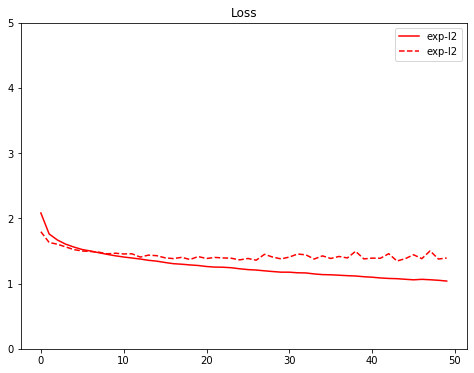

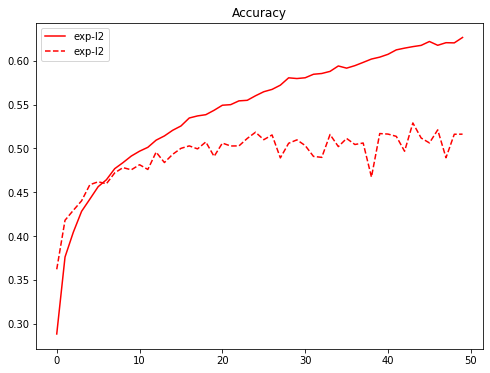

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()